In [1]:
int RUN = 326; //runnumber  //一番データ数が多い0326を使う 2023/03/12
int ch = 1;    //液シン番号
double offset = 6.0; //[MeVee]

In [2]:
TFile *f = TFile::Open(Form("./../root/%04d_ng1.root",RUN));
TTree *tree = (TTree *)f->Get("tree");

In [3]:
TCanvas *c2 = new TCanvas("c2","c2",800,600);

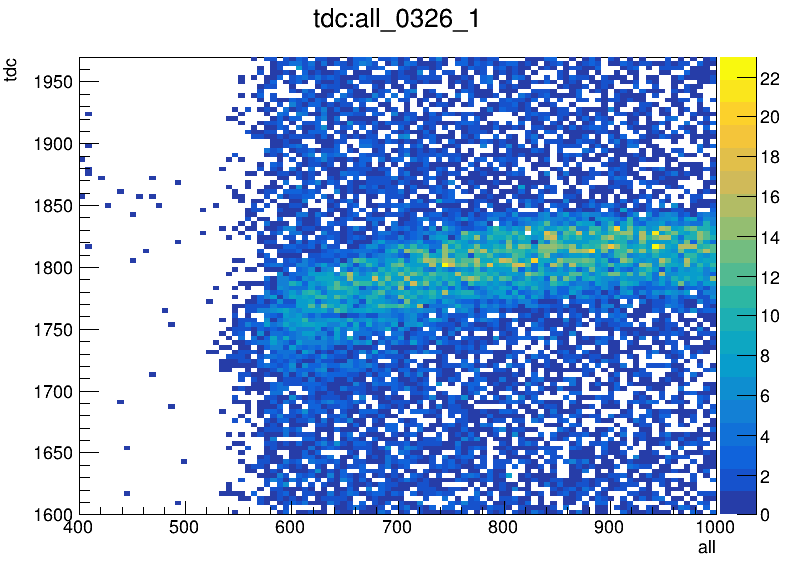

In [4]:
TH2F *tdcall = new TH2F("tdcall",Form("tdc:all_0%d_%d;all;tdc",RUN,ch),100,400,1000,100,1600,1970);
tree->Draw(Form("tdc[7]:all[%d]>>tdcall",ch));
          //,Form("all_ee[%d]>%f",ch,5.0));
tdcall->Draw("colz");
tdcall->SetStats(0);
c2->Draw();
//c2->SaveAs(Form("./../figure/tdc_qdcall_0%d_%d.pdf",RUN,ch));

In [5]:
TF1 *h = new TF1("h","[0]+[1]*x",400,1200);
h->SetParameter(0,1800);
h->SetParameter(1,0.2);
tdcall->Fit(h,"","",500,650);

TF1 *hm = new TF1("hm","1.81223e+03 ",400,1200);


****************************************
Minimizer is Minuit / Migrad
Chi2                      =  1.93513e+06
NDf                       =         1320
Edm                       =  3.10896e-15
NCalls                    =           45
p0                        =      1653.77   +/-   55.2288     
p1                        =     0.199635   +/-   0.090388    


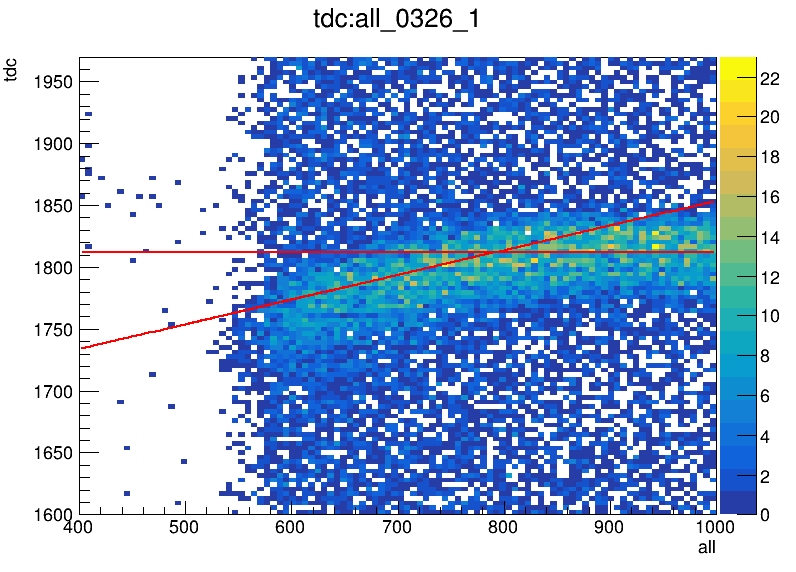

Info in <TCanvas::Print>: pdf file ./../figure/tdc_caibfunc_0326_1.pdf has been created


In [6]:
tdcall->Draw("colz");
h->Draw("same");
hm->Draw("same");
c2->Draw();
c2->SaveAs(Form("./../figure/tdc_caibfunc_0%d_%d.pdf",RUN,ch));

//cout << "chi2/NDF : " << h->GetChisquare()/h->GetNDF();

In [7]:
//fit範囲の記録
/*
1: 500,650
2: 500,650
3: 500,650
4: 510,630
5: 400,630
6: 400,490
*/

In [8]:
/*
TF1 *g = new TF1("g","[0]+[1]/([2]+[3]*x)",500,1200);
g->SetParameter(0,1800);
g->SetParameter(1,-100);
g->SetParameter(2,800);
g->SetParameter(3,100);
tdcall->Fit(g,"","",500,800); //1:620or650-1800
tdcall->Draw("colz");
g->Draw("same");
c2->Draw();
cout << "chi2/NDF : " << g->GetChisquare()/g->GetNDF();
*/

In [9]:
/*
TF1 *f = new TF1("f","[0]+[1]*exp([2]+[3]*x)",500,1200);
f->SetParameter(0,1800);
f->SetParameter(1,-1);
f->SetParameter(2,500);
f->SetParameter(3,-10);
tdcall->Fit(f,"","",500,1800);
f->Draw("same");
c2->Draw();
*/

In [10]:
/*
TF1 *h = new TF1("h","[0]+[1]*x +[2]*pow(x,2)",600,1200);
h->SetParameter(0,1800);
h->SetParameter(1,1);
tdcall->Fit(h,"","",500,800);
tdcall->Draw("colz");
h->Draw("same");
c2->Draw();
cout << "chi2/NDF : " << h->GetChisquare()/h->GetNDF();
*/

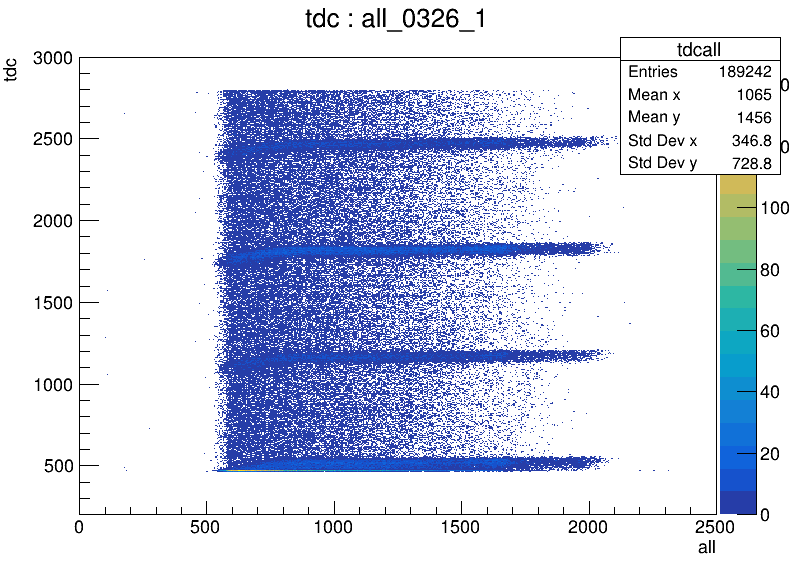

Warning in <TFile::Append>: Replacing existing TH1: tdcall (Potential memory leak).


In [11]:

TH2F *tdcall = new TH2F("tdcall",Form("tdc : all_0%d_%d;all;tdc",RUN,ch),500,0,2500,500,200,3000);
tree->Draw(Form("tdc[7]:all[%d]>>tdcall",ch)
           ,Form("tdc[%d]!=0",ch));
          //,Form("all_ee[%d]>%f",ch,5.0));
tdcall->Draw("colz");
c2->Draw();
//c2->SaveAs(Form("./../figure/tdc_qdcall_0%d_%d.pdf",RUN,ch)); ////

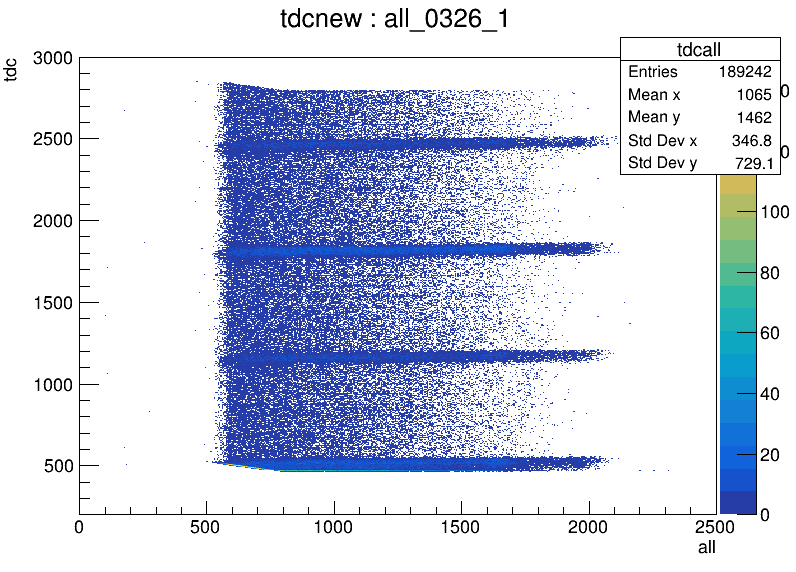

Warning in <TFile::Append>: Replacing existing TH1: tdcall (Potential memory leak).


In [12]:

TH2F *tdcall = new TH2F("tdcall",Form("tdcnew : all_0%d_%d;all;tdc",RUN,ch),500,0,2500,500,200,3000);
tree->Draw(Form("tdc_calib[7]:all[%d]>>tdcall",ch)
           ,Form("tdc[%d]!=0",ch));
          //,Form("all_ee[%d]>%f",ch,5.0));
tdcall->Draw("colz");
c2->Draw();
//c2->SaveAs(Form("./../figure/tdcnew_qdcall_0%d_%d.pdf",RUN,ch)); ////